In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Bag


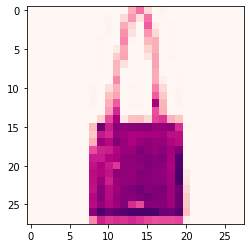

In [6]:
n=200
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='RdPu');

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)

In [11]:
y_test = to_categorical(y_test, 10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
model = Sequential()

In [14]:
model.add(Dense(88, input_dim = 784, activation = 'relu'))
model.add(Dense(821, activation = 'relu'))
model.add(Dense(325, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.03), metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 821)               73069     
_________________________________________________________________
dense_2 (Dense)              (None, 325)               267150    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3260      
Total params: 412,559
Trainable params: 412,559
Non-trainable params: 0
_________________________________________________________________


## 修改訓練次數


In [17]:
model.fit(x_train, y_train, batch_size=150, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0888 - acc: 0.1736
Epoch 2/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0857 - acc: 0.3255
Epoch 3/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0800 - acc: 0.4326
Epoch 4/50
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0698 - acc: 0.5623
Epoch 5/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0585 - acc: 0.6420
Epoch 6/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0508 - acc: 0.6554
Epoch 7/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0464 - acc: 0.6641
Epoch 8/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0434 - acc: 0.6783
Epoch 9/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0412 - acc: 0.70351
Epoch 10/50
60000/60000 [==============================] - 4s 70us/sample - loss:

## 把accuracy調到9成以上 

In [18]:
history=model.fit(x_train, y_train, batch_size=150, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0225 - acc: 0.8478
Epoch 2/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0224 - acc: 0.8486
Epoch 3/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0224 - acc: 0.8497
Epoch 4/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0223 - acc: 0.8500
Epoch 5/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0222 - acc: 0.8509
Epoch 6/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0221 - acc: 0.8509
Epoch 7/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0220 - acc: 0.8508
Epoch 8/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0220 - acc: 0.8523
Epoch 9/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0219 - acc: 0.8526
Epoch 10/50
60000/60000 [==============================] - 4s 71us/sample - loss: 

In [19]:
result = model.predict_classes(x_test)

In [20]:
from numpy import argmax

測試結果Ankle boot
答案Ankle boot
測試結果Pullover
答案Pullover
測試結果Trouser
答案Trouser
測試結果Trouser
答案Trouser
測試結果Shirt
答案Shirt
測試結果Trouser
答案Trouser
測試結果Coat
答案Coat
測試結果Shirt
答案Shirt
測試結果Sandal
答案Sandal
測試結果Sneaker
答案Sneaker


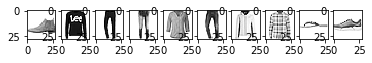

In [28]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    print('測試結果'+class_names[result[i]])
    print('答案'+class_names[argmax(y_test[i])])

## 目前看來正確率不錯  再加入互動元件 自己選擇要測試的

In [36]:
from ipywidgets import interact_manual
from ipywidgets import interact
from ipywidgets import widgets

In [41]:
def f(x):
    print('測試結果'+class_names[result[x]])
    print('答案'+class_names[argmax(y_test[x])])
    plt.imshow(x_test[x].reshape(28,28), cmap='coolwarm')
interact_manual(f,x=9999) ##0~9999 剛好一萬筆資料

interactive(children=(IntSlider(value=9999, description='x', max=29997, min=-9999), Button(description='Run In…

<function __main__.f(x)>